## **State updates by nodes**

* In the previous notebook the state is being overwritten by the nodes which means we are losing all the updates
* If we want to preserve the previous data or make transformations on top of that data, we can use Anootations and reducer functions
* The following example shows three ways updates can be done. Either through messages, math operations or string operations

In [1]:
from langgraph.graph import StateGraph, add_messages, START, END
from typing_extensions import TypedDict, Annotated
from operator import add

In [2]:
class State(TypedDict):
    var1: Annotated[list[str], add_messages]
    var2: Annotated[int, add]
    var3: Annotated[str, add]

In [3]:
builder1 = StateGraph(State)

def node1(state: State):
    return {"var1": ["b"], "var2": 2, "var3": "b"}

def node2(state: State):
    return {"var1": ["c"], "var2": 3, "var3": "c"}

builder1.add_node(node1, "node1")
builder1.add_node(node2, "node2")

builder1.add_edge(START, "node1")
builder1.add_edge("node1", "node2")
builder1.add_edge("node2", END)

graph1 =  builder1.compile()
graph1.debug = True

In [4]:
print(graph1.get_graph().print_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
  +-------+    
  | node1 |    
  +-------+    
      *        
      *        
      *        
  +-------+    
  | node2 |    
  +-------+    
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   
None


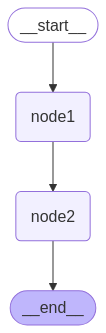

In [5]:
graph1

In [6]:
graph1.invoke({"var1": ["a"], "var2": 1, "var3": "a"})

[-1:checkpoint] State at the end of step -1:
{'var1': [], 'var2': 0, 'var3': ''}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'var1': ['a'], 'var2': 1, 'var3': 'a'}
[0:writes] Finished step 0 with writes to 3 channels:
- var1 -> ['a']
- var2 -> 1
- var3 -> 'a'
[0:checkpoint] State at the end of step 0:
{'var1': [HumanMessage(content='a', additional_kwargs={}, response_metadata={}, id='94b4a1aa-fa3d-459b-9877-4593d1d2088e')],
 'var2': 1,
 'var3': 'a'}
[1:tasks] Starting 1 task for step 1:
- node1 -> {'var1': [HumanMessage(content='a', additional_kwargs={}, response_metadata={}, id='94b4a1aa-fa3d-459b-9877-4593d1d2088e')],
 'var2': 1,
 'var3': 'a'}
[1:writes] Finished step 1 with writes to 3 channels:
- var1 -> ['b']
- var2 -> 2
- var3 -> 'b'
[1:checkpoint] State at the end of step 1:
{'var1': [HumanMessage(content='a', additional_kwargs={}, response_metadata={}, id='94b4a1aa-fa3d-459b-9877-4593d1d2088e'),
          HumanMessage(content='b', additional_kwargs={}, response_metada

{'var1': [HumanMessage(content='a', additional_kwargs={}, response_metadata={}, id='94b4a1aa-fa3d-459b-9877-4593d1d2088e'),
  HumanMessage(content='b', additional_kwargs={}, response_metadata={}, id='2ba13a55-8ab8-42f3-b92b-3555624ea871'),
  HumanMessage(content='c', additional_kwargs={}, response_metadata={}, id='7438f671-fbd2-47b0-8418-8a9c2408946a')],
 'var2': 6,
 'var3': 'abc'}

In [7]:
graph1.invoke({"var1": ["c"], "var2": 5, "var3": "c"})

[-1:checkpoint] State at the end of step -1:
{'var1': [], 'var2': 0, 'var3': ''}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'var1': ['c'], 'var2': 5, 'var3': 'c'}
[0:writes] Finished step 0 with writes to 3 channels:
- var1 -> ['c']
- var2 -> 5
- var3 -> 'c'
[0:checkpoint] State at the end of step 0:
{'var1': [HumanMessage(content='c', additional_kwargs={}, response_metadata={}, id='060b222b-bad2-47d8-96d0-59914d1e0203')],
 'var2': 5,
 'var3': 'c'}
[1:tasks] Starting 1 task for step 1:
- node1 -> {'var1': [HumanMessage(content='c', additional_kwargs={}, response_metadata={}, id='060b222b-bad2-47d8-96d0-59914d1e0203')],
 'var2': 5,
 'var3': 'c'}
[1:writes] Finished step 1 with writes to 3 channels:
- var1 -> ['b']
- var2 -> 2
- var3 -> 'b'
[1:checkpoint] State at the end of step 1:
{'var1': [HumanMessage(content='c', additional_kwargs={}, response_metadata={}, id='060b222b-bad2-47d8-96d0-59914d1e0203'),
          HumanMessage(content='b', additional_kwargs={}, response_metada

{'var1': [HumanMessage(content='c', additional_kwargs={}, response_metadata={}, id='060b222b-bad2-47d8-96d0-59914d1e0203'),
  HumanMessage(content='b', additional_kwargs={}, response_metadata={}, id='0f48b032-3df2-4dc3-9ce6-20a92f2eb4b1'),
  HumanMessage(content='c', additional_kwargs={}, response_metadata={}, id='77f574dc-a7ea-4a27-9694-0bab88474be5')],
 'var2': 10,
 'var3': 'cbc'}